In [38]:
import os
import sys
import json
import pandas as pd
import numpy as np
import mwparserfromhell as mw
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
%matplotlib inline

%load_ext autoreload
%autoreload 2
import processing # this makes the "processing" folder available as a python module

from features.combatants import get_combatant, get_combatants
from utils import remove_ref, get_templates

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
battles = json.load(open("../datasets/battle-fields-0.json"))
battles_ib = [b["infobox"] for b in battles if not b["infobox"].get("error")]
comb_parsed = [get_combatants(b) for b in battles_ib]
comb = [{"combatant_%s_source" % n: b.get("combatant%s"%n)  for n in range(1,4)} for b in battles_ib]
for cp, c in zip(comb_parsed, comb):
    cp.update(c)

In [45]:
print("tot", len(comb_parsed))
df = pd.DataFrame(comb_parsed).fillna(np.nan)
df.isna().sum()

tot 7486


combatant_1             60
combatant_1_source      11
combatant_2             66
combatant_2_source      13
combatant_3           7461
combatant_3_source    7103
dtype: int64

In [46]:
df[df["combatant_1"].isna()]

,combatant_1,combatant_1_source,combatant_2,combatant_2_source,combatant_3,combatant_3_source
937,NaN,\n,NaN,\n,NaN,\n
1840,NaN,forces of Constantine<br />(Western Empire)\n,NaN,forces of Licinius<br />(Eastern Empire)\n,NaN,NaN
1854,NaN,\n,NaN,\n,NaN,NaN
1999,NaN,{{USA}}\n,"[Iraqi insurgents, Al Qaeda in Iraq]",[[Iraqi insurgency (2003–06)|Iraqi insurgents]...,NaN,NaN
2106,NaN,{{Hungarian Revolution of 1848 participant|Hun...,NaN,{{Hungarian Revolution of 1848 participant|Aus...,NaN,NaN
2717,NaN,\n,NaN,\n,NaN,NaN
2997,NaN,\n,NaN,\n,NaN,\n
3025,NaN,<!-- Image with unknown copyright status remov...,[Scotland],Percy Faction<br> [[File:Royal Arms of the Kin...,NaN,NaN
3343,NaN,\n,NaN,\n,NaN,NaN
3561,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
mw.parse("{{Coat of arms|Holy Roman Empire}}").strip_code()

''

7426 7420 25
4492


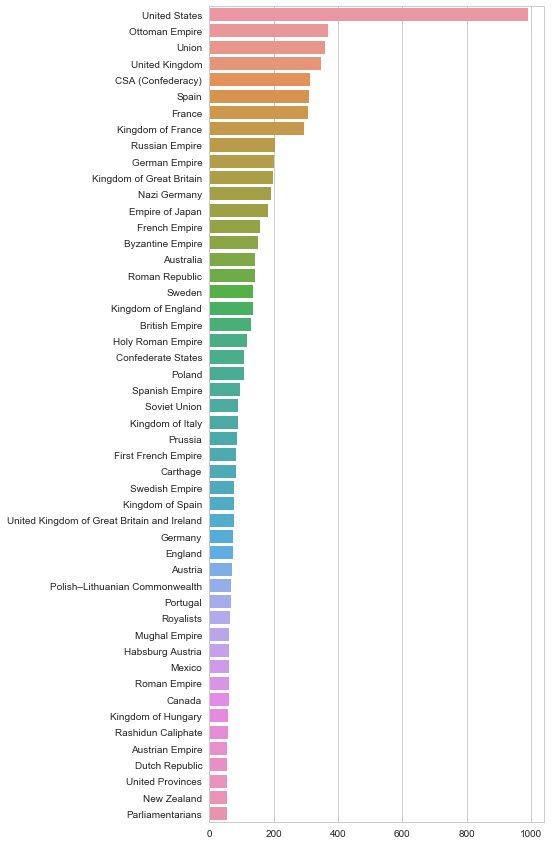

In [47]:
cbt_1 = np.array(df["combatant_1"].dropna())
cbt_2 = np.array(df["combatant_2"].dropna())
cbt_3 = np.array(df["combatant_3"].dropna())
print(len(cbt_1), len(cbt_2), len(cbt_3))

cbt_all = np.concatenate((cbt_1, cbt_2, cbt_3))

all_cbt_names = [c for cl in cbt_all for c in cl]
names = pd.Series(all_cbt_names)
print(len(set(all_cbt_names)))

f, ax = plt.subplots(figsize=(6, 15))
counts = names.value_counts().sort_values(ascending=False)
counts = counts.head(50)
sns.barplot(x=counts, y=counts.index, ax=ax)